In [12]:
from keras.initializers import RandomUniform
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

import numpy as np
import time

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
num_classes = 10
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_train = x_train.astype('float32')
x_train /= 255.0

x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)
x_test = x_test.astype('float32')
x_test /= 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)

x_train: (60000, 784)
y_train: (60000, 10)


In [14]:
model = Sequential()
model.add(Dense(320, activation='relu', 
                kernel_initializer=RandomUniform(minval=0.0000001, maxval=0.0001, seed=None),
                input_shape=[x_train.shape[1]]))
model.add(Dropout(0.66))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])

t0 = time.time()
history = model.fit(x_train, y_train,
         batch_size=512,
         epochs=40,
         verbose=1,
         validation_split=0.2)
t1 = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 0s 8us/step - loss: 0.6205 - acc: 0.8286 - val_loss: 0.2864 - val_acc: 0.9205
Epoch 2/40
48000/48000 [==============================] - 0s 4us/step - loss: 0.3284 - acc: 0.9059 - val_loss: 0.2217 - val_acc: 0.9378
Epoch 3/40
48000/48000 [==============================] - 0s 6us/step - loss: 0.2671 - acc: 0.9236 - val_loss: 0.1885 - val_acc: 0.9469
Epoch 4/40
48000/48000 [==============================] - 0s 5us/step - loss: 0.2316 - acc: 0.9337 - val_loss: 0.1644 - val_acc: 0.9529
Epoch 5/40
48000/48000 [==============================] - 0s 5us/step - loss: 0.2061 - acc: 0.9409 - val_loss: 0.1467 - val_acc: 0.9583
Epoch 6/40
48000/48000 [==============================] - 0s 5us/step - loss: 0.1869 - acc: 0.9462 - val_loss: 0.1361 - val_acc: 0.9611
Epoch 7/40
48000/48000 [==============================] - 0s 5us/step - loss: 0.1717 - acc: 0.9493 - val_loss: 0.1268 - val_acc: 0.963

10000/10000 [==============================] - 0s 14us/step


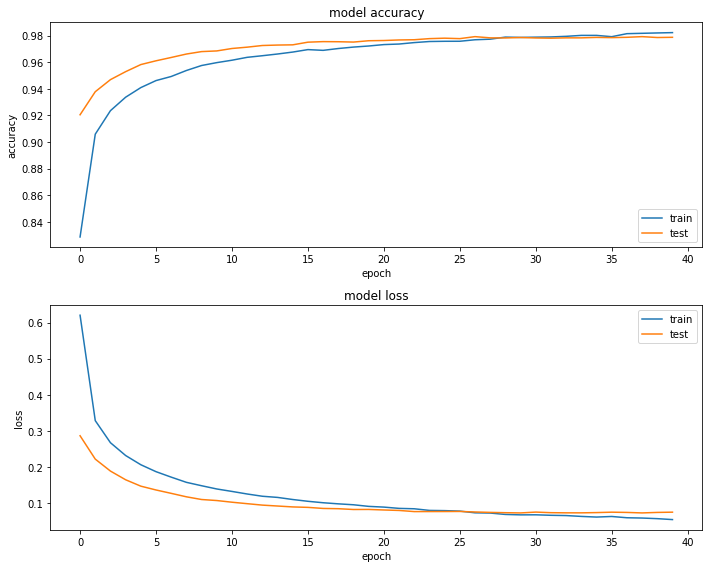

time elapsed: 10.248 seconds
test loss:   0.069
test accuracy:  97.900 %


In [15]:
score = model.evaluate(x_test, y_test, verbose=1)
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()

print('time elapsed: %6.3f' % float(t1-t0), 'seconds')
print('test loss: %7.3f' % score[0])
print('test accuracy: %7.3f' % (score[1] * 100), '%')